<a href="https://colab.research.google.com/github/Prathambiradr12345/Data-Analyst/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class label','Alcohol','Malic Acid']

In [7]:
df

,class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

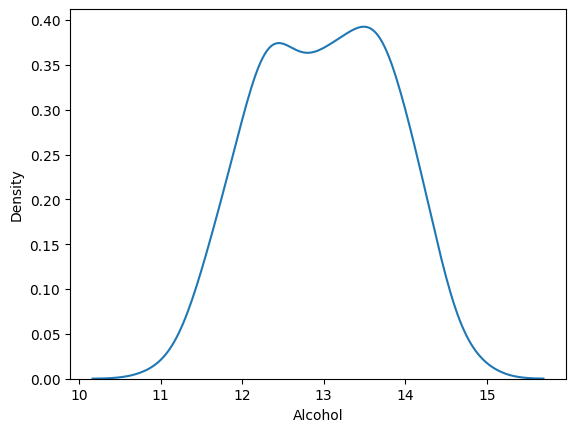

In [8]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

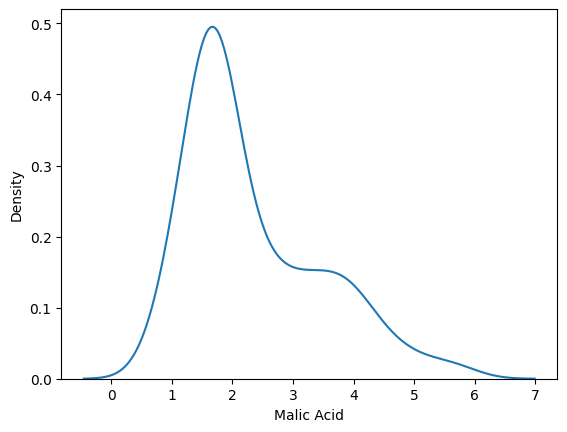

In [9]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

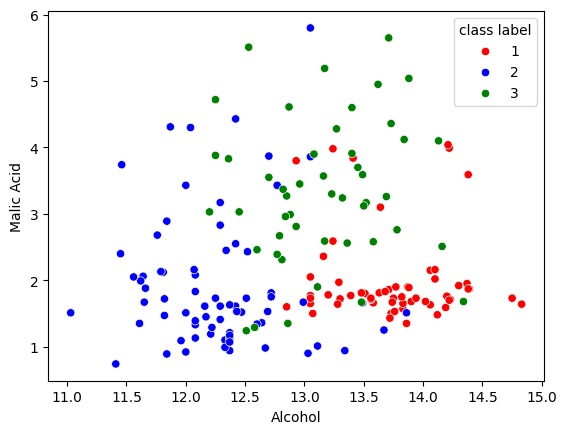

In [11]:
color={1:'r',2:'b',3:'g'}
sns.scatterplot(x='Alcohol', y='Malic Acid', hue='class label', data=df, palette=color)
# The 'x' and 'y' arguments are now keyword arguments, specifying the columns to use.
# The 'data' argument is now used to pass the DataFrame.
# The 'palette' argument is used to apply the custom colors defined in the 'color' dictionary.

In [13]:
from sklearn.model_selection import train_test_split

# Define x and y using the DataFrame 'df'
x = df[['Alcohol', 'Malic Acid']]  # Features
y = df['class label']  # Target variable

# Now you can use train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [16]:
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler with correct capitalization
scaler = MinMaxScaler() # Instantiate with correct capitalization
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
x_train_scaled=pd.DataFrame(x_train,columns=['Alcohol','Malic Acid'])
x_test_scaled=pd.DataFrame(x_test,columns=['Alcohol','Malic Acid'])

In [18]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


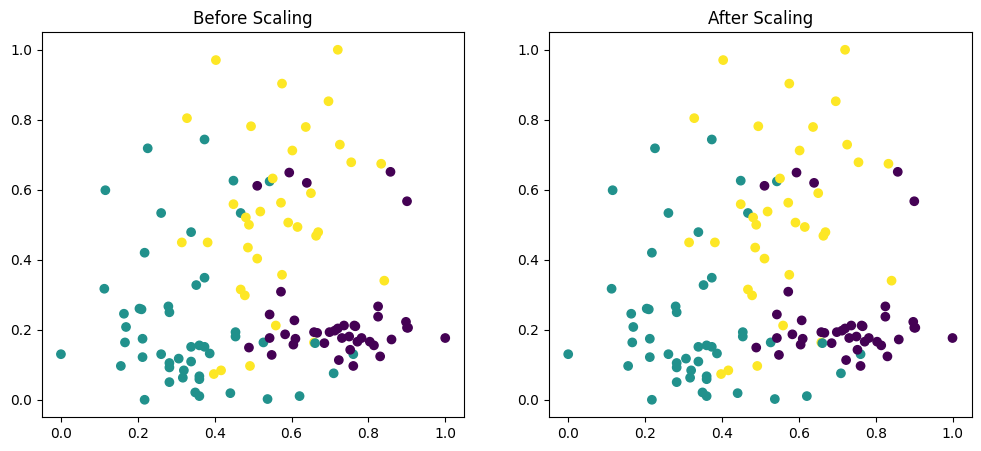

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Accessing columns by index for x_train (NumPy array)
ax1.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
ax1.set_title("Before Scaling")

# Accessing columns by name for x_train_scaled (DataFrame)
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic Acid'], c=y_train)
ax2.set_title("After Scaling")

plt.show()

NameError: name 'X_train' is not defined

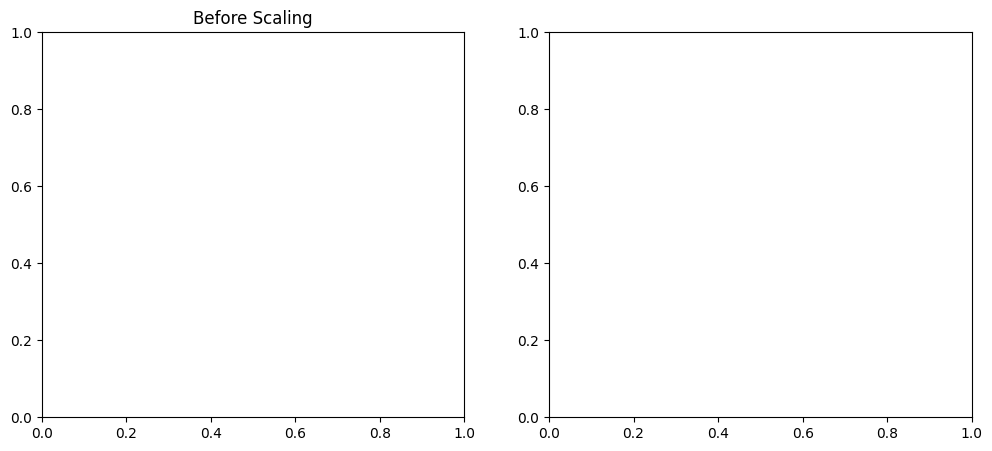

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

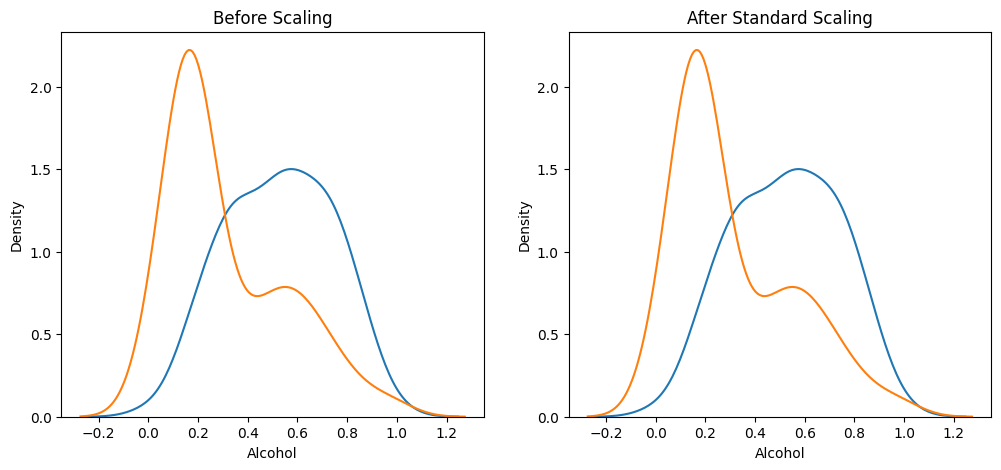

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax1)  # Use x_train_scaled (DataFrame) for column access
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax1) # Use x_train_scaled (DataFrame) for column access

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2)
plt.show()